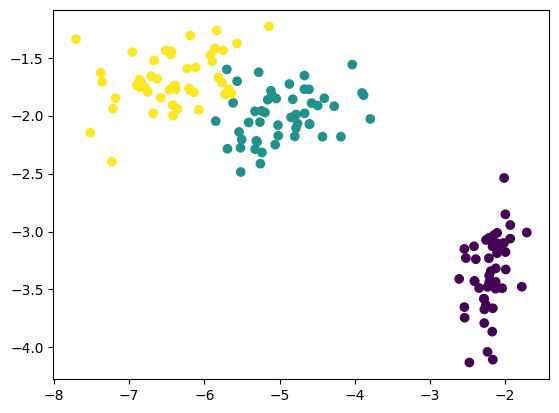

In [3]:
from sklearn import datasets, preprocessing
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
scale=preprocessing.StandardScaler(with_std=False)


#importer les données iris
iris=datasets.load_iris()
X=iris.data
y=iris.target
labels=iris.target_names
#centrer les données

#calculer la matrice intra-classe
var_class=np.zeros((4,4))
for i in range(len(labels)):
    x=X[y==i]
    
    mean_class=x.mean(axis=0)
    var_class+=((x-mean_class).T)@(x-mean_class)
W=var_class


#variance inter-classe
var_e_class=np.zeros((4,4))
for i in range(len(labels)):
    x=X[y==i]
    
    mean_class=x.mean(axis=0)
    
    m=X.mean(axis=0)
    
    var_e_class+=(len(x)*(mean_class-m).reshape((4,1)))@((mean_class-m).T.reshape(1,4))
    
    
B=var_e_class/150


#diagonaliser et trouver l'espace de projection
A=linalg.inv(W)@(B)
V,P=linalg.eig(A)
#print(V)
#print(P)

#print(B)
idx_ord=np.argsort(V)[::-1]
proj_ord=P[idx_ord]
proj=proj_ord[0:2]
projected=X@(proj.T)


x1=projected[:,0]
x2=projected[:,1]
plt.scatter(x1,x2,c=y)


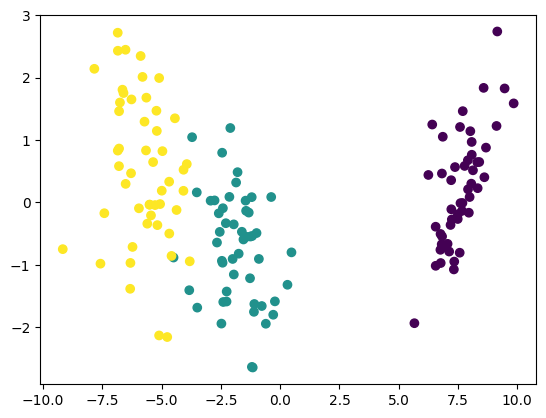

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda=LinearDiscriminantAnalysis(n_components=2)
iris_lda=lda.fit_transform(X,y)
plt.scatter(iris_lda[:,0],iris_lda[:,1],c=y)

In [45]:
class my_lda:
    def __init__(self,n_components):
        self.n_components=n_components 
        pass


14
